# Checking the accident severity based on different conditions

In [1]:
# Key Features:
# Driver Attributes: Age band, Sex, Educational Level, Driving Experience
# Road and Environmental Factors: Road Surface Type, Light Conditions, Weather Conditions, Types of Junction
# Accident Details: Type of Collision, Vehicle Movement, Pedestrian Movement, Cause of Accident
# Dependent Variable: Accident Severity: An integer representing the severity of an accident 0:serious injured,1:Slight injured.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings("ignore")

In [4]:
RAS=pd.read_csv(r"C:\Users\Prajakta\Desktop\salary data for DA project\RoadAccident.csv")
RAS

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,1
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,1
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,0
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,1
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12153,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,1
12154,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,1
12155,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,0
12156,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,1


In [5]:
RAS.head(2)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,1
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,1


In [6]:
RAS.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [7]:
RAS.shape

(12158, 15)

In [8]:
RAS.describe(include="all")

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12158,12158,12158,12158,12158,12158,12158,12158,12158,12158,12158,12158,12158,12158,12158.000000
unique,5,3,7,4,8,7,8,6,4,9,10,13,9,20,NaN
top,18-30,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,NaN
freq,4209,11285,7522,9513,3322,4362,4490,11148,8711,9928,8670,8059,11248,2243,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.856638
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350456
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [9]:
RAS.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [17]:
RAS.dtypes

Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity           int64
dtype: object

In [19]:
RAS.Age_band_of_driver.value_counts() 

Age_band_of_driver
18-30       4209
31-50       4033
Over 51     1561
Unknown     1542
Under 18     813
Name: count, dtype: int64

In [20]:
RAS.Sex_of_driver.value_counts()

Sex_of_driver
Male       11285
Female       696
Unknown      177
Name: count, dtype: int64

In [23]:
RAS.Educational_level.value_counts()

Educational_level
Junior high school    7522
Elementary school     2139
High school           1095
Unknown                827
Above high school      357
Writing & reading      173
Illiterate              45
Name: count, dtype: int64

In [24]:
RAS.Vehicle_driver_relation.value_counts()

Vehicle_driver_relation
Employee    9513
Owner       1939
Unknown      584
Other        122
Name: count, dtype: int64

In [27]:
RAS.Driving_experience.value_counts()

Driving_experience
5-10yr        3322
2-5yr         2567
Above 10yr    2233
1-2yr         1735
Below 1yr     1335
Unknown        816
No Licence     118
unknown         32
Name: count, dtype: int64

In [29]:
RAS.Lanes_or_Medians.value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4362
Undivided Two way                                   3734
other                                               1638
Double carriageway (median)                         1013
One way                                              833
Unknown                                              437
Two-way (divided with solid lines road marking)      141
Name: count, dtype: int64

In [31]:
RAS.Types_of_Junction.value_counts()

Types_of_Junction
Y Shape        4490
No junction    3766
Crossing       2165
Unknown        1059
Other           443
O Shape         163
T Shape          60
X Shape          12
Name: count, dtype: int64

In [32]:
RAS.Road_surface_type.value_counts()

Road_surface_type
Asphalt roads                       11148
Earth roads                           351
Gravel roads                          242
Unknown                               171
Other                                 166
Asphalt roads with some distress       80
Name: count, dtype: int64

In [35]:
RAS.Light_conditions.value_counts()

Light_conditions
Daylight                   8711
Darkness - lights lit      3220
Darkness - no lighting      187
Darkness - lights unlit      40
Name: count, dtype: int64

In [36]:
RAS.Weather_conditions.value_counts()

Weather_conditions
Normal               9928
Raining              1308
Other                 296
Unknown               292
Cloudy                125
Windy                  98
Snow                   61
Raining and Windy      40
Fog or mist            10
Name: count, dtype: int64

In [39]:
RAS.Type_of_collision.value_counts()

Type_of_collision
Vehicle with vehicle collision             8670
Collision with roadside objects            1762
Collision with pedestrians                  874
Rollover                                    393
Collision with animals                      169
Unknown                                     167
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
With Train                                    9
Name: count, dtype: int64

In [40]:
RAS.Vehicle_movement.value_counts()

Vehicle_movement
Going straight         8059
Moving Backward         973
Other                   927
Reversing               556
Turnover                482
Unknown                 389
Getting off             334
Entering a junction     189
Overtaking               91
Stopping                 60
U-Turn                   50
Waiting to go            38
Parked                   10
Name: count, dtype: int64

In [42]:
RAS.Pedestrian_movement.value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         11248
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              330
Unknown or other                                                                                                                           286
Crossing from driver's nearside                                                                                                            139
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               71
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                             

In [45]:
RAS.Cause_of_accident.value_counts()

Cause_of_accident
No distancing                           2243
Changing lane to the right              1785
Changing lane to the left               1457
Driving carelessly                      1380
No priority to vehicle                  1194
Moving Backward                         1111
No priority to pedestrian                716
Other                                    449
Overtaking                               426
Driving under the influence of drugs     335
Driving to the left                      280
Getting off the vehicle improperly       194
Driving at high speed                    172
Overturning                              147
Turnover                                  76
Overspeed                                 60
Overloading                               57
Drunk driving                             27
Unknown                                   25
Improper parking                          24
Name: count, dtype: int64

In [46]:
RAS.Accident_severity.value_counts()

Accident_severity
1    10415
0     1743
Name: count, dtype: int64

In [48]:
# Slight Injury     10415-1
# Serious Injury     1743-0

In [51]:
RAS.Accident_severity.value_counts()

Accident_severity
1    10415
0     1743
Name: count, dtype: int64

# Label Encoder

In [53]:
c_columns=['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident']
for i in c_columns:
    RAS[i] = le.fit_transform(RAS[i])
RAS

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,0,0,5,1,0,3,2,3,2,5,9,1
1,1,1,4,0,3,4,1,0,3,2,8,2,5,16,1
2,0,1,4,0,0,6,1,0,3,2,2,2,5,0,0
3,0,1,4,0,2,6,7,2,0,2,8,2,5,1,1
4,0,1,4,0,1,6,7,0,0,2,8,2,5,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12153,1,1,5,0,1,4,1,0,3,2,8,2,5,10,1
12154,4,1,1,0,2,2,1,0,3,2,8,4,5,10,1
12155,2,1,4,0,2,2,1,0,3,2,8,4,5,1,0
12156,0,0,4,0,3,4,1,0,0,2,8,4,5,5,1


In [54]:
RAS.Accident_severity.value_counts()

Accident_severity
1    10415
0     1743
Name: count, dtype: int64

# Duplicate value checking

In [58]:
RAS.shape

(12158, 15)

In [60]:
RAS.drop_duplicates(inplace=True)

In [62]:
RAS.shape

(11768, 15)

# EDA(Exploratory Data Analysis)


In [66]:
d1=RAS.corr()
d1

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
Age_band_of_driver,1.000000,-0.352353,0.018764,-0.010067,-0.014281,0.004648,-0.021598,-0.010921,-0.003993,0.021549,0.004400,-0.009726,0.002651,-0.005595,0.006573
Sex_of_driver,-0.352353,1.000000,0.005050,0.010250,0.010598,-0.011151,0.005597,-0.001435,0.036216,-0.005968,-0.014070,-0.001139,0.005750,0.001455,0.009192
Educational_level,0.018764,0.005050,1.000000,0.109399,0.180820,0.003495,0.011768,0.011468,-0.004729,0.000729,-0.012698,0.012829,-0.001290,0.002445,-0.001867
Vehicle_driver_relation,-0.010067,0.010250,0.109399,1.000000,0.305722,0.025236,-0.004682,-0.003109,0.009298,-0.023416,0.007041,-0.007610,0.013438,-0.008774,0.000041
Driving_experience,-0.014281,0.010598,0.180820,0.305722,1.000000,0.003453,0.003944,0.011737,-0.009567,-0.004904,0.017453,0.002021,-0.015941,-0.004232,-0.009876
Lanes_or_Medians,0.004648,-0.011151,0.003495,0.025236,0.003453,1.000000,-0.001786,-0.022559,0.007833,0.005453,0.003747,-0.001067,0.003130,0.020810,-0.001877
Types_of_Junction,-0.021598,0.005597,0.011768,-0.004682,0.003944,-0.001786,1.000000,0.000191,0.031809,0.004526,0.004512,-0.005458,-0.010285,-0.003684,-0.008815
Road_surface_type,-0.010921,-0.001435,0.011468,-0.003109,0.011737,-0.022559,0.000191,1.000000,-0.006276,-0.003001,-0.007106,-0.007641,-0.006213,-0.022179,-0.003279
Light_conditions,-0.003993,0.036216,-0.004729,0.009298,-0.009567,0.007833,0.031809,-0.006276,1.000000,-0.065669,0.012082,0.025523,0.010653,0.004206,0.001503
Weather_conditions,0.021549,-0.005968,0.000729,-0.023416,-0.004904,0.005453,0.004526,-0.003001,-0.065669,1.000000,-0.008243,0.003267,0.020340,0.000153,0.008444


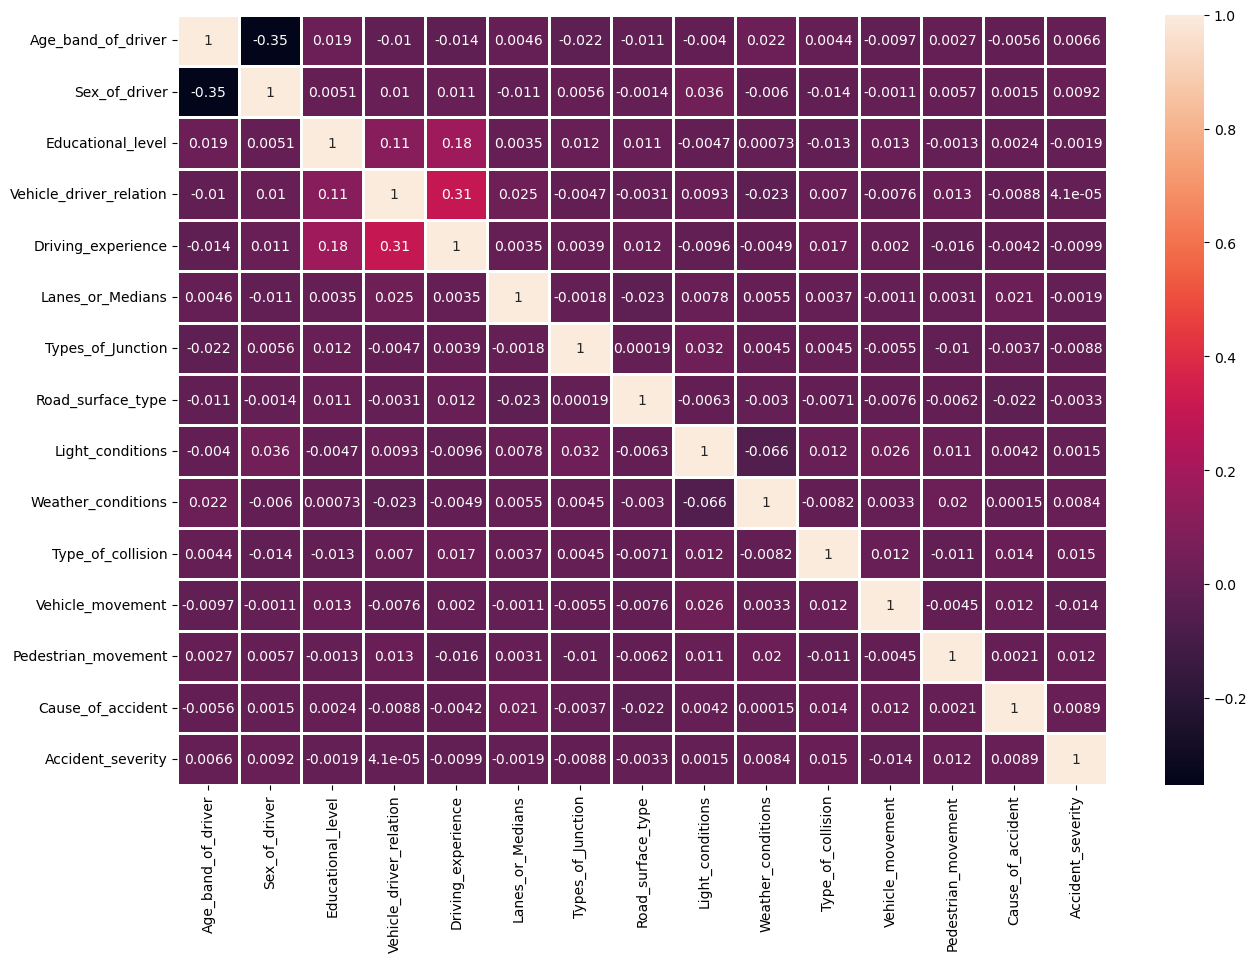

In [67]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(d1,linewidth=1,annot=True)

# from above heatmap we can conclude that
# driving experience and educational level has positive corelation
# Driving_experience and Vehicle_driver_relation has strong positive relaition

<Axes: xlabel='Accident_severity', ylabel='Age_band_of_driver'>

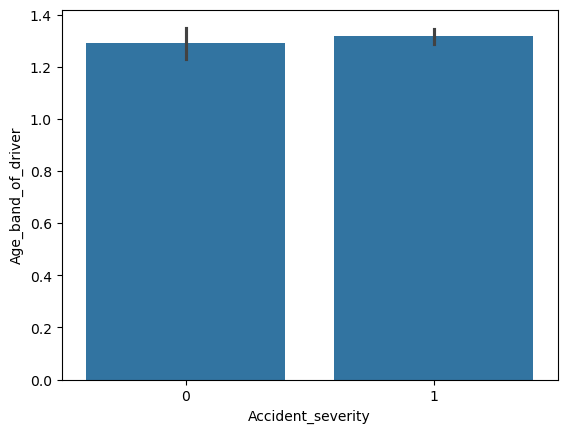

In [70]:
# ageband is no effect on accident_severity
sns.barplot(x="Accident_severity",y="Age_band_of_driver",data=RAS)

<Axes: xlabel='Accident_severity', ylabel='Sex_of_driver'>

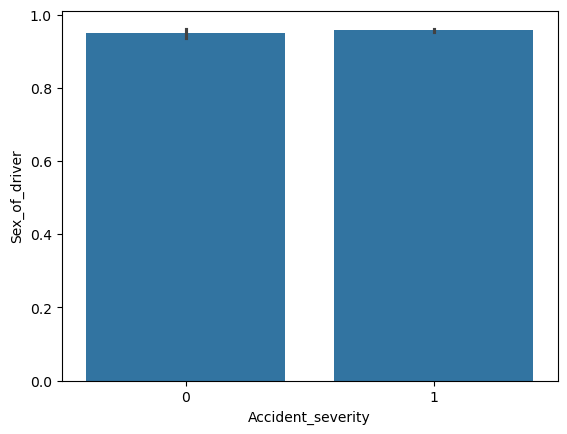

In [71]:
sns.barplot(x="Accident_severity",y="Sex_of_driver",data=RAS)

<Axes: xlabel='Accident_severity', ylabel='Weather_conditions'>

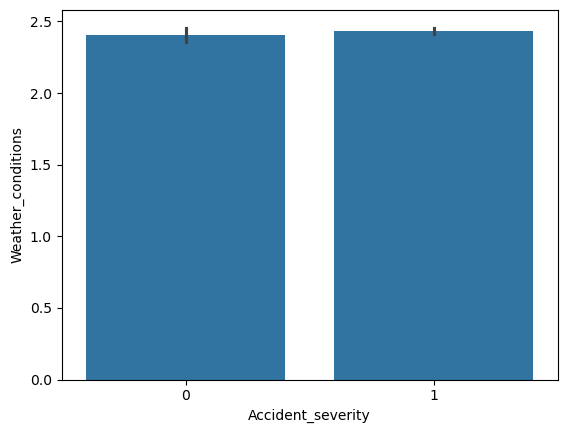

In [72]:
# from the below graph we can conclude that weather_condition has minimal effect on accident severity
sns.barplot(x="Accident_severity",y="Weather_conditions",data=RAS)

<Axes: xlabel='Weather_conditions', ylabel='Driving_experience'>

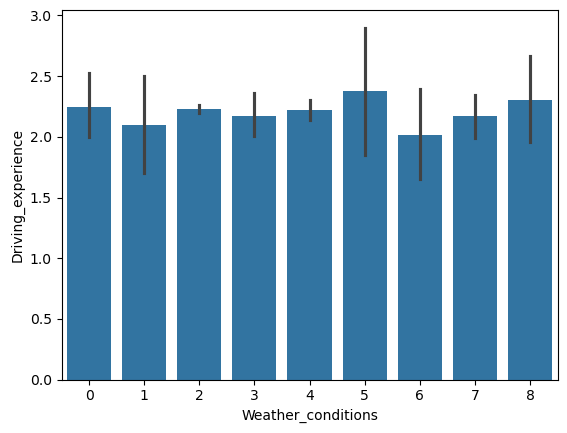

In [73]:
# Driving_experience is may differ according to Weather_conditions if it is Raining and Windy 
# from below graph we can conclude that weather conditions don't seem to significantly impact the driving experience
sns.barplot(data=RAS,x="Weather_conditions",y="Driving_experience")

<Axes: xlabel='Accident_severity', ylabel='Driving_experience'>

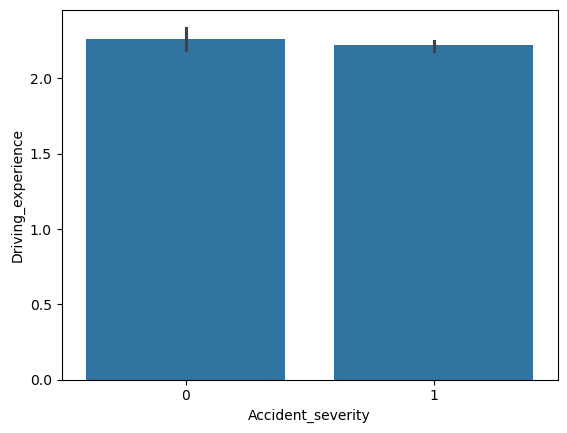

In [74]:
#driving experience has effect on accident severity
sns.barplot(x="Accident_severity",y="Driving_experience",data=RAS)

<Axes: xlabel='Accident_severity', ylabel='Road_surface_type'>

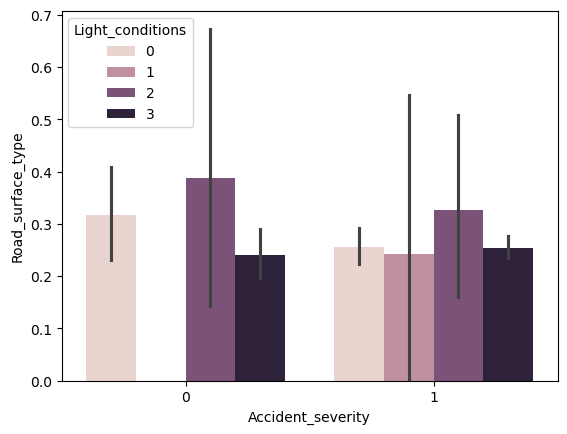

In [75]:
#The graph shows that Road_surface_type varies with Accident_severity, and Light_conditions influence this relationship, with noticeable variability especially in conditions 0 and 2
sns.barplot(x="Accident_severity",y="Road_surface_type",hue="Light_conditions",data=RAS)

<Axes: xlabel='Accident_severity', ylabel='count'>

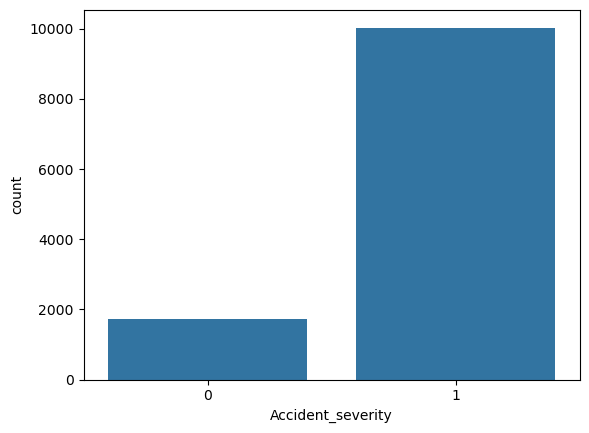

In [76]:
# Target column has Class imbalance issue
sns.countplot(x="Accident_severity",data=RAS)

<Axes: >

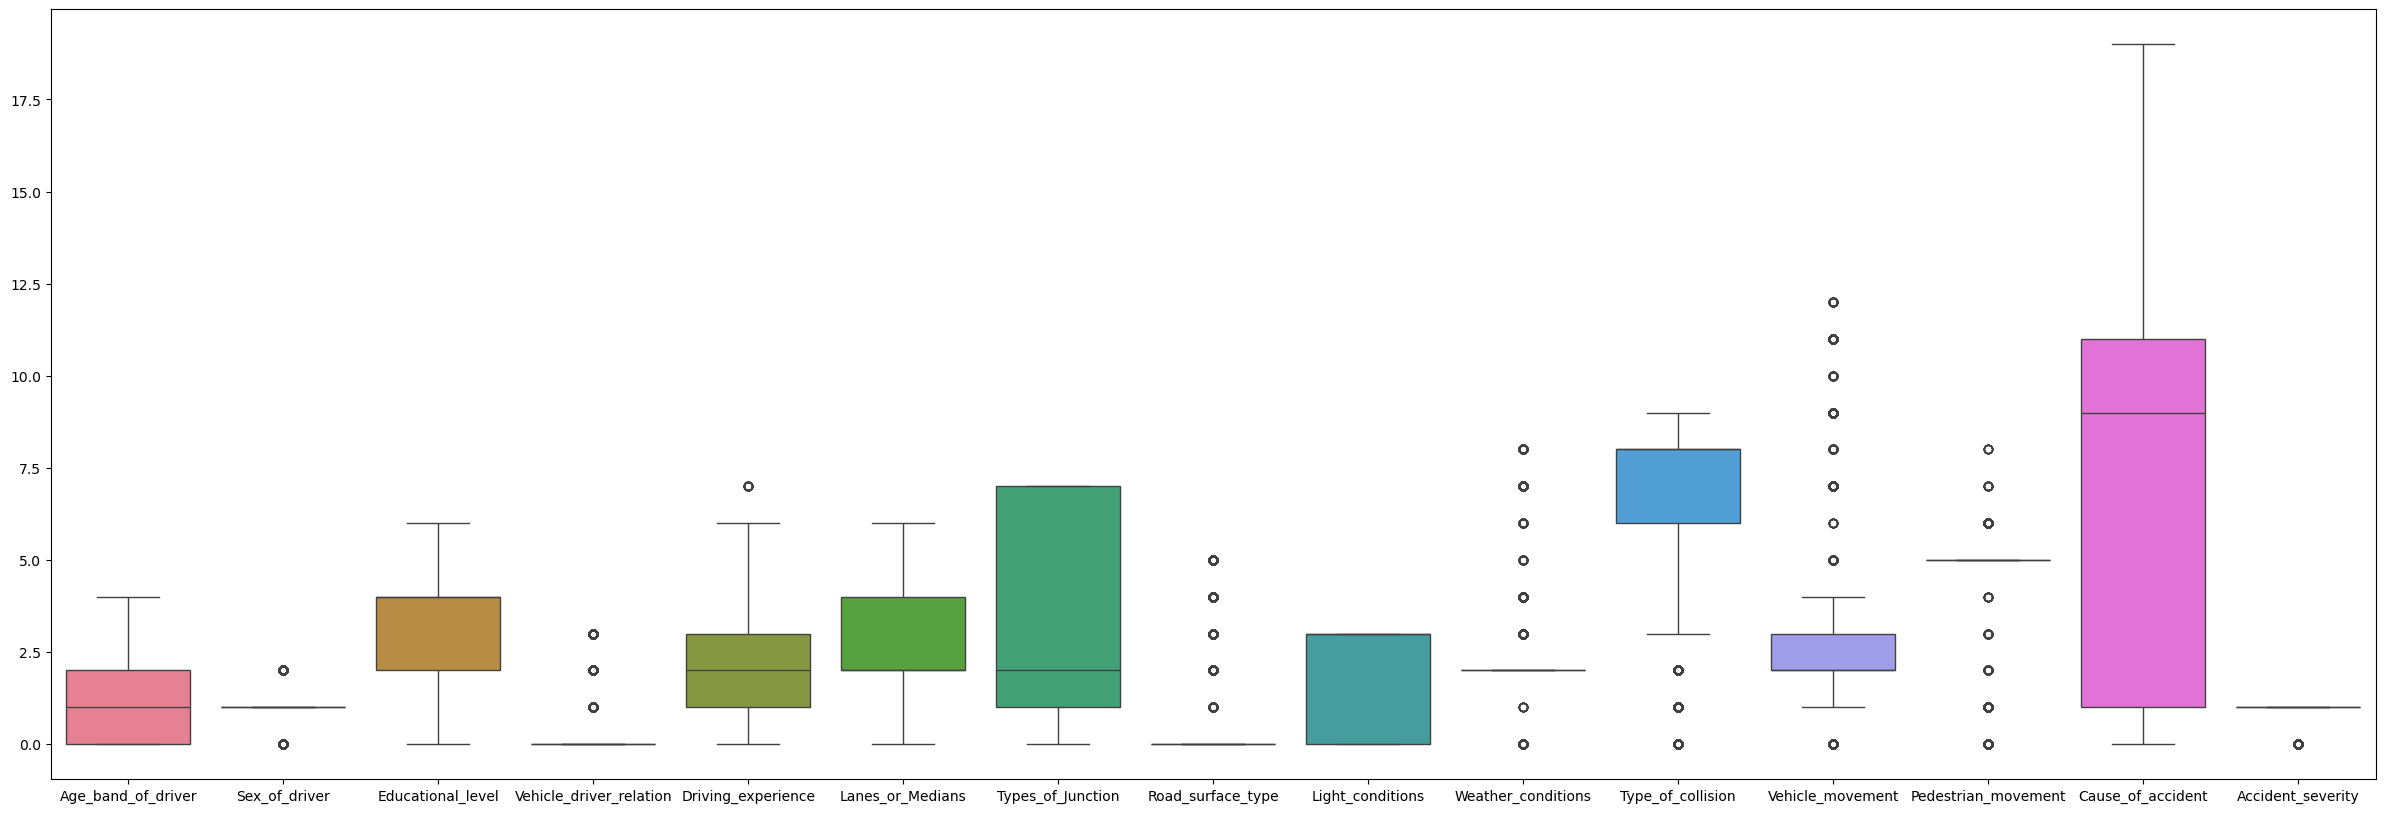

In [77]:
plt.figure(figsize=[30,10])
sns.boxplot(data=RAS)

# Model Creation

In [79]:
RAS.head(2)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,0,0,5,1,0,3,2,3,2,5,9,1
1,1,1,4,0,3,4,1,0,3,2,8,2,5,16,1


In [80]:
RAS.shape

(11768, 15)

In [81]:
x=RAS.iloc[:,0:-1]
y=RAS.iloc[:,-1]
x.shape,y.shape

((11768, 14), (11768,))

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [85]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((2354, 14), (9414, 14), (9414,), (2354,))

# Logistic Regression

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [88]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [89]:
lg.fit(x_train,y_train)

LogisticRegression()

In [90]:
p=lg.predict(x_test)

In [91]:
p_value=lg.predict_proba(x_test)

In [92]:
cm=confusion_matrix(p,y_test)
cm

array([[   0,    0],
       [ 341, 2013]], dtype=int64)

In [93]:
ac1=cm.diagonal().sum()/cm.sum()*100
ac1

85.51401869158879

In [110]:
TN,FP,FN,TP = cm.ravel()

In [114]:
lp=TP/(TP+FP)
lp

1.0

In [115]:
lr=TP/(TP+FN)
lr

0.8551401869158879

In [116]:
lf1=2*(lp*lr)/(lp+lr)
lf1

0.9219143576826196

In [117]:
print(classification_report(p,y_test))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.92      2354

    accuracy                           0.86      2354
   macro avg       0.50      0.43      0.46      2354
weighted avg       1.00      0.86      0.92      2354



In [118]:
df=pd.DataFrame(p_value)

In [120]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

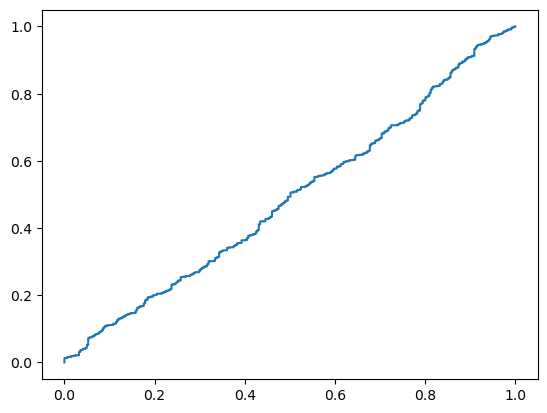

In [122]:
fpr,tpr,threshold=roc_curve(y_test,df.iloc[:,1])
plt.plot(fpr,tpr)

In [124]:
# prc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [126]:
precision,recall,threshold=precision_recall_curve(y_test,df.iloc[:,1])

Text(0.5, 1.0, 'precision-recall')

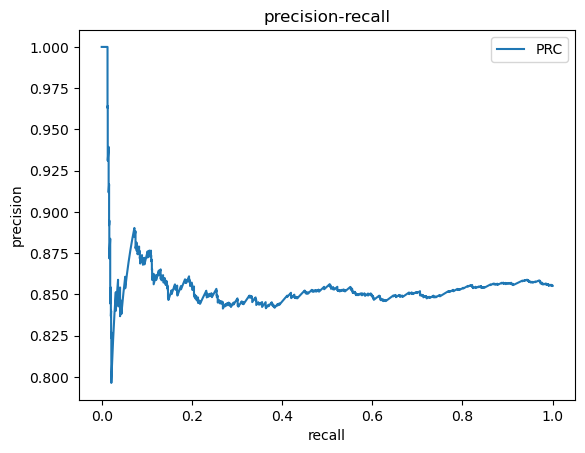

In [127]:
plt.plot(recall,precision,label="PRC")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper right")
plt.title("precision-recall")

# Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [130]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [132]:
p1=dt.predict(x_test)

In [133]:
cm1=confusion_matrix(p1,y_test)
cm1

array([[  68,  364],
       [ 273, 1649]], dtype=int64)

In [134]:
d_acc=cm1.diagonal().sum()/cm1.sum()*100
d_acc

72.93967714528462

In [135]:
print(classification_report(p1,y_test))

              precision    recall  f1-score   support

           0       0.20      0.16      0.18       432
           1       0.82      0.86      0.84      1922

    accuracy                           0.73      2354
   macro avg       0.51      0.51      0.51      2354
weighted avg       0.71      0.73      0.72      2354



In [136]:
TN1,FP1,FN1,TP1 = cm1.ravel()

In [137]:
dp= TP1/(TP1+FP1)
dp

0.8191753601589667

In [138]:
dr= TP1/(TP1+FN1)
dr

0.8579604578563996

In [142]:
df1= 2 * (dp* dr) / (dp + dr)
df1

0.8381194409148667

# Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [147]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [148]:
p2=rf.predict(x_test)

In [149]:
cm2=confusion_matrix(p2,y_test)
cm2

array([[   2,   33],
       [ 339, 1980]], dtype=int64)

In [150]:
rf_ac=cm2.diagonal().sum()/cm2.sum()*100
rf_ac

84.19711129991504

In [151]:
print(classification_report(p2,y_test))

              precision    recall  f1-score   support

           0       0.01      0.06      0.01        35
           1       0.98      0.85      0.91      2319

    accuracy                           0.84      2354
   macro avg       0.49      0.46      0.46      2354
weighted avg       0.97      0.84      0.90      2354



In [152]:
TN2,FP2,FN2,TP2 = cm2.ravel()

In [153]:
rp= TP2/(TP2+FP2)
rp

0.9836065573770492

In [154]:
Rr= TP2/(TP2+FN2)
Rr

0.8538163001293662

In [155]:
rf1= 2 * (rp* Rr) / (rp + Rr)
rf1

0.9141274238227147

# Support Vector Machine

In [157]:
from sklearn.svm import SVC
svc=SVC()

In [158]:
svc.fit(x_train,y_train)

SVC()

In [159]:
sp=svc.predict(x_test)

In [160]:
sm=confusion_matrix(sp,y_test)
sm

array([[   0,    0],
       [ 341, 2013]], dtype=int64)

In [161]:
s_acc=sm.diagonal().sum()/sm.sum()*100
s_acc

85.51401869158879

In [162]:
print(classification_report(sp,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.92      2354

    accuracy                           0.86      2354
   macro avg       0.50      0.43      0.46      2354
weighted avg       1.00      0.86      0.92      2354



In [163]:
TN3,FP3,FN3,TP3 = sm.ravel()

In [164]:
sp= TP3/(TP3+FP3) #precision=tp/tp+fp

In [165]:
sr=  TP3/(TP3+FN3) #recall=tp/tp+fn
sr

0.8551401869158879

In [166]:
sf1= 2 * (sp* sr) / (sp + sr)
sf1

0.9219143576826196

# Naive Bayes

In [168]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [169]:
nb.fit(x_train,y_train)

MultinomialNB()

In [170]:
np=nb.predict(x_test)

In [171]:
nb_m=confusion_matrix(np,y_test)
nb_m

array([[   0,    0],
       [ 341, 2013]], dtype=int64)

In [172]:
n_acc=nb_m.diagonal().sum()/nb_m.sum()*100
n_acc

85.51401869158879

In [173]:
print(classification_report(np,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.92      2354

    accuracy                           0.86      2354
   macro avg       0.50      0.43      0.46      2354
weighted avg       1.00      0.86      0.92      2354



In [174]:
TN4,FP4,FN4,TP4 = nb_m.ravel()

In [175]:
np= TP4/(TP4+FP4)
np

1.0

In [176]:
nr= TP4/(TP4+FN4)
nr

0.8551401869158879

In [177]:
nf1= 2 * (np* nr) / (np + nr)
nf1

0.9219143576826196

# K-Nearest Neighbours

In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=40)

In [180]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [182]:
kp=knn.predict(x_test)

In [183]:
k_c=confusion_matrix(kp,y_test)
k_c

array([[   0,    0],
       [ 341, 2013]], dtype=int64)

In [184]:
k_acc=k_c.diagonal().sum()/k_c.sum()*100
k_acc

85.51401869158879

In [185]:
TN5,FP5,FN5,TP5 = k_c.ravel()

In [186]:
kp= TP5/(TP5+FP5)
kp

1.0

In [187]:
kr= TP5/(TP5+FN5)
kr

0.8551401869158879

In [188]:
kf1= 2 * (kp* kr) / (kp + kr)
kf1

0.9219143576826196

# Report

In [195]:
list1=["Logistic Regression","Decision Tree","Random Forest","Suppoort Vector Machine","Naive Bayes","K-Nearest Neighbours"]
list2=[ac1,d_acc,rf_ac,s_acc,n_acc,k_acc]
list4=[lp,dp,rp,sp,np,kp]
list5=[lr,dr,Rr,sr,nr,kr]
list6=[lf1,df1,rf1,sf1,nf1,kf1]

In [196]:
result=pd.DataFrame({"model_name":list1,"Accuracy":list2,"Precision":list4,"Recall":list5,"F1-Score":list6})
result

,model_name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,85.514019,1.000000,0.855140,0.921914
1,Decision Tree,72.939677,0.819175,0.857960,0.838119
2,Random Forest,84.197111,0.983607,0.853816,0.914127
3,Suppoort Vector Machine,85.514019,1.000000,0.855140,0.921914
4,Naive Bayes,85.514019,1.000000,0.855140,0.921914
5,K-Nearest Neighbours,85.514019,1.000000,0.855140,0.921914


# Before class-imbalance treatment logistic regression is given me best result

# My data has a class imbalance problem so im performing class imbalance treatment

# Class Imbalance Treatment

# Random over sampling

In [261]:
RAS.Accident_severity.value_counts()

Accident_severity
1    10031
0     1737
Name: count, dtype: int64

In [262]:
c_1,c_0=RAS["Accident_severity"].value_counts()
c_0,c_1

(1737, 10031)

In [263]:
train_0=RAS[RAS["Accident_severity"]==0]
train_1=RAS[RAS["Accident_severity"]==1]
train_0.shape,train_1.shape

((1737, 15), (10031, 15))

In [264]:
class_1_over=train_0.sample(c_1,replace=True)

In [265]:
class_1_0=pd.concat([class_1_over,train_1],axis=0)

In [266]:
class_1_0.shape

(20062, 15)

In [267]:
class_1_0["Accident_severity"].value_counts()

Accident_severity
0    10031
1    10031
Name: count, dtype: int64

#Outlier treatment

<Axes: ylabel='Driving_experience'>

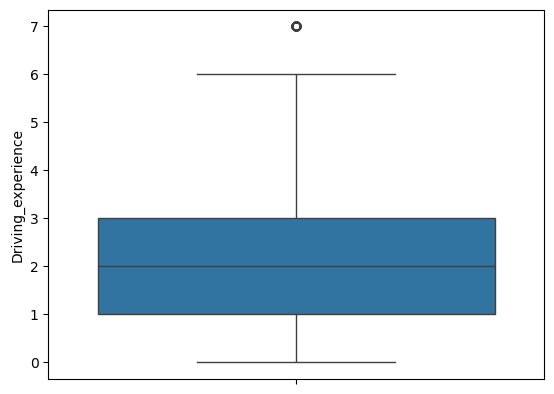

In [269]:
sns.boxplot(data=class_1_0,y="Driving_experience")

(array([2818., 4301., 5359.,    0., 3695., 2288.,    0.,  169., 1366.,
          66.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

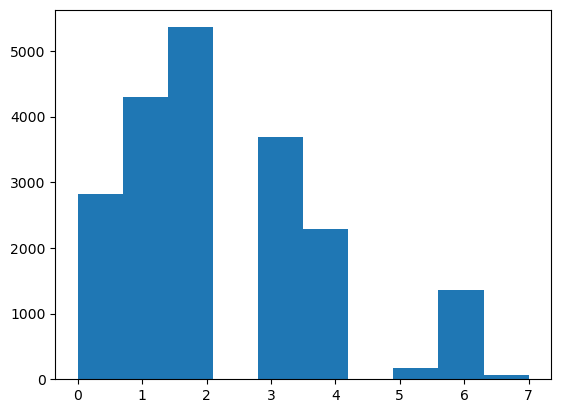

In [270]:
plt.hist(class_1_0["Driving_experience"])

<Axes: xlabel='Driving_experience', ylabel='Density'>

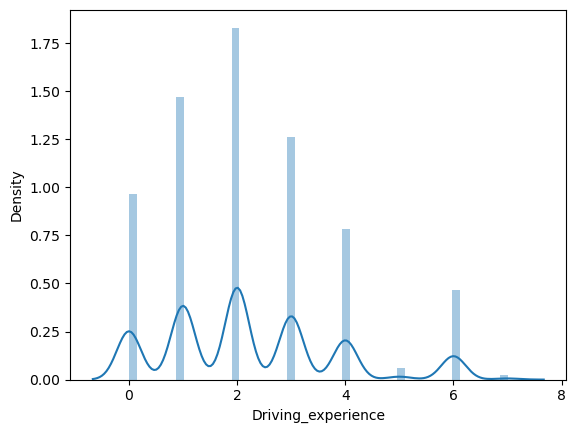

In [271]:
sns.distplot(class_1_0["Driving_experience"])

In [272]:
up=class_1_0["Driving_experience"].mean()+3*class_1_0["Driving_experience"].std()
dw=class_1_0["Driving_experience"].mean()-3*class_1_0["Driving_experience"].std()

In [273]:
class_1_0.loc[class_1_0["Driving_experience"]>up,"Driving_experience"]=up

(array([2818., 4301., 5359.,    0., 3695., 2288.,    0.,  169., 1366.,
          66.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

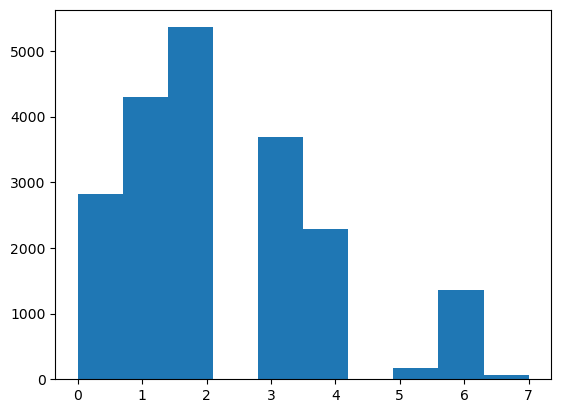

In [274]:
plt.hist(class_1_0["Driving_experience"])

<Axes: xlabel='Driving_experience', ylabel='Density'>

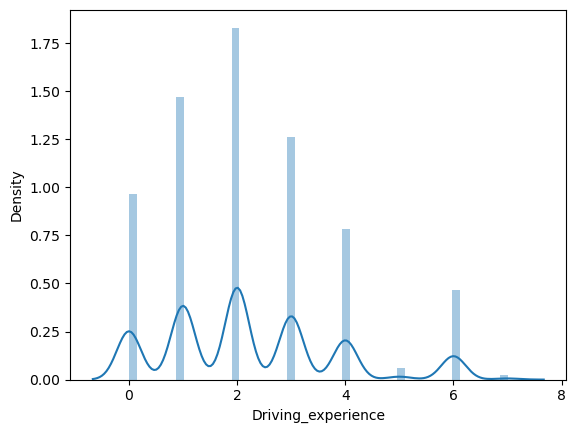

In [275]:
sns.distplot(class_1_0["Driving_experience"])

In [276]:
class_1_0.skew()

Age_band_of_driver         0.843871
Sex_of_driver             -2.020936
Educational_level         -0.837924
Vehicle_driver_relation    1.549874
Driving_experience         0.695350
Lanes_or_Medians           0.147635
Types_of_Junction          0.164276
Road_surface_type          3.729714
Light_conditions          -1.009844
Weather_conditions         2.853584
Type_of_collision         -1.129206
Vehicle_movement           2.015068
Pedestrian_movement       -3.987603
Cause_of_accident          0.089093
Accident_severity          0.000000
dtype: float64

In [277]:
rx=class_1_0.iloc[:,0:14]
ry=class_1_0.iloc[:,-1]
rx.shape,ry.shape

((20062, 14), (20062,))

In [278]:
rx_train,rx_test,ry_train,ry_test=train_test_split(rx,ry,test_size=0.2,random_state=101)

In [279]:
rx_train.shape,rx_test.shape,ry_train.shape,ry_test.shape

((16049, 14), (4013, 14), (16049,), (4013,))

# Logistic Regression

In [281]:
lg.fit(rx_train,ry_train)

LogisticRegression()

In [282]:
pr=lg.predict(rx_test)

In [283]:
cm11=confusion_matrix(pr,ry_test)
cm11

array([[ 891,  807],
       [1160, 1155]], dtype=int64)

In [284]:
ac11=cm11.diagonal().sum()/cm11.sum()*100
ac11

50.98430102167954

In [285]:
TN6,FP6,FN6,TP6 = cm11.ravel()

In [286]:
rolp= TP6/(TP6+FP6)
rolp

0.5886850152905199

In [287]:
rolr= TP6/(TP6+FN6)
rolr

0.49892008639308855

In [288]:
rolf1= 2 * (rolp*rolr) / (rolp + rolr)
rolf1

0.5400981996726677

In [289]:
print(classification_report(pr,ry_test))

              precision    recall  f1-score   support

           0       0.43      0.52      0.48      1698
           1       0.59      0.50      0.54      2315

    accuracy                           0.51      4013
   macro avg       0.51      0.51      0.51      4013
weighted avg       0.52      0.51      0.51      4013



# Random Forest

In [291]:
rf.fit(rx_train,ry_train)

RandomForestClassifier()

In [292]:
rpr=rf.predict(rx_test)

In [293]:
p_value=rf.predict_proba(rx_test)

In [294]:
rcm11=confusion_matrix(rpr,ry_test)
rcm11

array([[2022,  127],
       [  29, 1835]], dtype=int64)

In [295]:
rac11=rcm11.diagonal().sum()/rcm11.sum()*100
rac11

96.112633939696

In [296]:
TN7,FP7,FN7,TP7 = rcm11.ravel()

In [297]:
rofp=TP7/(TP7+FP7)
rofp

0.935270132517839

In [298]:
rofr=TP7/(TP7+FN7)
rofr

0.9844420600858369

In [299]:
roff1= 2 * (rofp*rofr) / (rofp + rofr)
roff1

0.9592263460533195

In [300]:
print(classification_report(rpr,ry_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2149
           1       0.94      0.98      0.96      1864

    accuracy                           0.96      4013
   macro avg       0.96      0.96      0.96      4013
weighted avg       0.96      0.96      0.96      4013



In [301]:
# Auc curve---TN rate is low
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

In [302]:
roc=roc_auc_score(rpr,ry_test)
roc

0.9626724027744213

In [303]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
roc=roc_auc_score(rpr,ry_test)
roc

0.9626724027744213

In [304]:
fpr,tpr,threshold=roc_curve(ry_test,rpr)

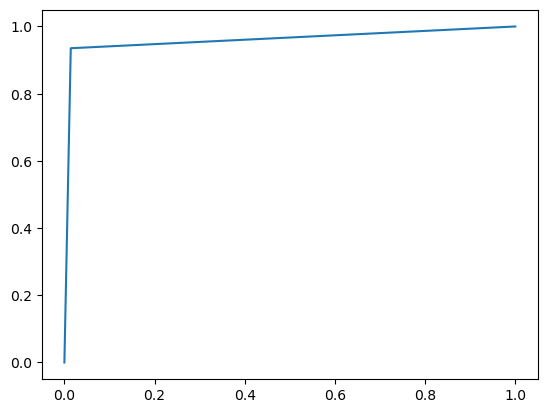

In [305]:
plt.plot(fpr,tpr)

# Decision Tree

In [307]:
dt.fit(rx_train,ry_train)

DecisionTreeClassifier()

In [308]:
dpr=dt.predict(rx_test)

In [309]:
dcm11=confusion_matrix(dpr,ry_test)
dcm11

array([[2031,  392],
       [  20, 1570]], dtype=int64)

In [310]:
dac11=dcm11.diagonal().sum()/dcm11.sum()*100
dac11

89.73336655868428

In [311]:
TN8,FP8,FN8,TP8 = dcm11.ravel()

In [312]:
rodp=TP8/(TP8+FP8)
rodp

0.800203873598369

In [313]:
rodr= TP8/(TP8+FN8)
rodr

0.9874213836477987

In [314]:
rodf1= 2 * (rodp*rodr) / (rodp + rodr)
rodf1

0.8840090090090089

In [315]:
print(classification_report(dpr,ry_test))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2423
           1       0.80      0.99      0.88      1590

    accuracy                           0.90      4013
   macro avg       0.90      0.91      0.90      4013
weighted avg       0.91      0.90      0.90      4013



# SVM(Support Vector Machine)

In [317]:
svc.fit(rx_train,ry_train)

SVC()

In [318]:
spr=svc.predict(rx_test)

In [319]:
scm11=confusion_matrix(spr,ry_test)
scm11

array([[1225,  910],
       [ 826, 1052]], dtype=int64)

In [320]:
sac11=scm11.diagonal().sum()/scm11.sum()*100
sac11

56.740593072514336

In [321]:
TN9,FP9,FN9,TP9 = scm11.ravel()

In [322]:
rosp= TP9/(TP9+FP9)
rosp

0.5361875637104995

In [323]:
rosr= TP9/(TP9+FN9)
rosr

0.5601703940362087

In [324]:
rosf1= 2 * (rosp*rosr) / (rosp + rosr)
rosf1

0.5479166666666667

In [325]:
print(classification_report(spr,ry_test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59      2135
           1       0.54      0.56      0.55      1878

    accuracy                           0.57      4013
   macro avg       0.57      0.57      0.57      4013
weighted avg       0.57      0.57      0.57      4013



# Naive Bayes

In [327]:
nb.fit(rx_train,ry_train)

MultinomialNB()

In [328]:
npr=nb.predict(rx_test)

In [329]:
ncm13=confusion_matrix(npr,ry_test)
ncm13

array([[ 979,  908],
       [1072, 1054]], dtype=int64)

In [330]:
nac13=ncm13.diagonal().sum()/ncm13.sum()*100
nac13

50.66035384998754

In [331]:
TN10,FP10,FN10,TP10= ncm13.ravel()

In [332]:
nosp= TP10/(TP10+FP10)
nosp

0.5372069317023446

In [333]:
nosr= TP10/(TP10+FN10)
nosr

0.49576669802445905

In [334]:
nosf1= 2 * (nosp*nosr) / (nosp + nosr)
nosf1

0.5156555772994129

In [335]:
print(classification_report(npr,ry_test))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50      1887
           1       0.54      0.50      0.52      2126

    accuracy                           0.51      4013
   macro avg       0.51      0.51      0.51      4013
weighted avg       0.51      0.51      0.51      4013



# K-NN(K-Nearest Neighbours)

In [337]:
knn.fit(rx_train,ry_train)

KNeighborsClassifier(n_neighbors=40)

In [338]:
knpr=knn.predict(rx_test)

In [339]:
kncm14=confusion_matrix(knpr,ry_test)
kncm14

array([[1450, 1085],
       [ 601,  877]], dtype=int64)

In [340]:
knac11=kncm14.diagonal().sum()/kncm14.sum()*100
knac11

57.98654373286818

In [341]:
TN11,FP11,FN11,TP11 = kncm14.ravel()

In [342]:
knosp= TP11/(TP11+FP11)
knosp

0.44699286442405706

In [343]:
knosr=  TP11/(TP11+FN11)
knosr

0.5933694181326117

In [344]:
knosf1= 2 * (knosp*knosr) / (knosp + knosr)
knosf1

0.5098837209302325

In [345]:
print(classification_report(knpr,ry_test))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63      2535
           1       0.45      0.59      0.51      1478

    accuracy                           0.58      4013
   macro avg       0.58      0.58      0.57      4013
weighted avg       0.61      0.58      0.59      4013



# Random Over Sampling Report

In [347]:
l1=["Logistic Regression","Random Forest","Decision Tree","Support Vector Machine","Naive Bayes","K-Nearest Neighbour"]
l2=[ac11,rac11,dac11,sac11,nac13,knac11]
l4=[rolp,rofp,rodp,rosp,nosp,knosp]
l5=[rolr,rofr,rodr,rosr,nosr,knosr]
l6=[rolf1,roff1,rodf1,rosf1,nosf1,knosf1]

In [348]:
result1=pd.DataFrame({"model_name":l1,"Accuracy":l2,"Precision":l4,"Recall":l5,"F1-Score":l6})
result1

,model_name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,50.984301,0.588685,0.498920,0.540098
1,Random Forest,96.112634,0.935270,0.984442,0.959226
2,Decision Tree,89.733367,0.800204,0.987421,0.884009
3,Support Vector Machine,56.740593,0.536188,0.560170,0.547917
4,Naive Bayes,50.660354,0.537207,0.495767,0.515656
5,K-Nearest Neighbour,57.986544,0.446993,0.593369,0.509884


# I have applied all the over sampling techniques from that random over sampling is given me better result for Random Forest.

# Feature Selection

In [351]:
# RFS(Recursive Feature Selection) 

In [352]:
from sklearn.feature_selection import RFE

In [353]:
rfe=RFE(dt)

In [354]:
rfe.fit(rx,ry)

RFE(estimator=DecisionTreeClassifier())

In [355]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False,  True,  True, False,  True])

In [356]:
df3=pd.DataFrame(rfe.support_)
df3

,0
0,True
1,False
2,True
3,False
4,True
5,True
6,False
7,False
8,False
9,False


In [357]:
pdf4=pd.DataFrame({"feature_score":list(rfe.support_),"columns":list(class_1_0.iloc[:,:-1])})
pdf4

,feature_score,columns
0,True,Age_band_of_driver
1,False,Sex_of_driver
2,True,Educational_level
3,False,Vehicle_driver_relation
4,True,Driving_experience
5,True,Lanes_or_Medians
6,False,Types_of_Junction
7,False,Road_surface_type
8,False,Light_conditions
9,False,Weather_conditions


In [358]:
data_newx=class_1_0.drop(["Age_band_of_driver","Sex_of_driver","Types_of_Junction","Road_surface_type","Light_conditions","Weather_conditions","Pedestrian_movement"],axis=1)
data_newx

,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Type_of_collision,Vehicle_movement,Cause_of_accident,Accident_severity
8717,4,0,1.0,4,8,2,1,0
8833,4,2,6.0,4,8,7,9,0
9,4,0,0.0,4,3,10,9,0
3047,5,3,6.0,0,8,2,12,0
5752,2,2,2.0,4,6,12,9,0
...,...,...,...,...,...,...,...,...
12151,1,0,2.0,6,2,2,4,1
12153,5,0,1.0,4,8,2,10,1
12154,1,0,2.0,2,8,4,10,1
12156,4,0,3.0,4,8,4,5,1


In [359]:
xrf=data_newx.iloc[:,0:-1]
yrf=data_newx.iloc[:,-1]

In [360]:
xrf.shape,yrf.shape

((20062, 7), (20062,))

In [361]:
frx_train,frx_test,fry_train,fry_test=train_test_split(xrf,yrf,test_size=0.2,random_state=101)

In [362]:
frx_train.shape,frx_test.shape,fry_train.shape,fry_test.shape

((16049, 7), (4013, 7), (16049,), (4013,))

In [363]:
rf.fit(frx_train,fry_train)

RandomForestClassifier()

In [364]:
fpr1=rf.predict(frx_test)

In [365]:
frcm11=confusion_matrix(fpr1,fry_test)
frcm11

array([[1828,  456],
       [ 223, 1506]], dtype=int64)

In [366]:
frac11=frcm11.diagonal().sum()/frcm11.sum()*100
frac11

83.07999003239472

In [367]:
TNf,FPf,FNf,TPf = frcm11.ravel()

In [368]:
frofp=TPf/(TPf+FPf)
frofp

0.7675840978593272

In [369]:
frofr=TPf/(TPf+FNf)
frofr

0.8710237131289763

In [370]:
froff1= 2 * (frofp*frofr) / (frofp + frofr)
froff1

0.8160390138173936

In [371]:
print(classification_report(fpr1,fry_test))


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2284
           1       0.77      0.87      0.82      1729

    accuracy                           0.83      4013
   macro avg       0.83      0.84      0.83      4013
weighted avg       0.84      0.83      0.83      4013



# chi-square

In [373]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [374]:
cst=SelectKBest(score_func=chi2,k="all")

In [375]:
cst_fit=cst.fit(rx,ry)
cst_fit

SelectKBest(k='all', score_func=<function chi2 at 0x0000026B0518AAC0>)

In [376]:
cst_score=cst_fit.scores_
cst_score

array([4.77850213e+00, 1.05672390e-01, 2.21350175e-02, 1.64812526e-03,
       1.23383007e+00, 8.73821431e-02, 1.15596067e+00, 4.63424049e-01,
       1.85848018e-01, 1.14657444e+00, 2.16923266e+01, 1.17648437e+01,
       5.32395880e-01, 3.68205418e+01])

In [379]:
rdf2=pd.DataFrame(cst_score)
rdf2

,0
0,4.778502
1,0.105672
2,0.022135
3,0.001648
4,1.233830
5,0.087382
6,1.155961
7,0.463424
8,0.185848
9,1.146574


In [385]:
rpdf3=pd.DataFrame({"feature_score":list(cst_score),"columns":list(class_1_0.iloc[:,:-1])})
rpdf3

,feature_score,columns
0,4.778502,Age_band_of_driver
1,0.105672,Sex_of_driver
2,0.022135,Educational_level
3,0.001648,Vehicle_driver_relation
4,1.233830,Driving_experience
5,0.087382,Lanes_or_Medians
6,1.155961,Types_of_Junction
7,0.463424,Road_surface_type
8,0.185848,Light_conditions
9,1.146574,Weather_conditions


In [386]:
dnewx=class_1_0.drop(["Age_band_of_driver","Sex_of_driver","Educational_level","Vehicle_driver_relation","Lanes_or_Medians","Light_conditions","Weather_conditions","Pedestrian_movement"],axis=1)
dnewx

,Driving_experience,Types_of_Junction,Road_surface_type,Type_of_collision,Vehicle_movement,Cause_of_accident,Accident_severity
8717,1.0,1,0,8,2,1,0
8833,6.0,7,4,8,7,9,0
9,0.0,7,0,3,10,9,0
3047,6.0,7,0,8,2,12,0
5752,2.0,1,0,6,12,9,0
...,...,...,...,...,...,...,...
12151,2.0,1,0,2,2,4,1
12153,1.0,1,0,8,2,10,1
12154,2.0,1,0,8,4,10,1
12156,3.0,1,0,8,4,5,1


In [388]:
cxrf=dnewx.iloc[:,0:-1]
cyrf=dnewx.iloc[:,-1]

In [389]:
cxrf.shape,cyrf.shape

((20062, 6), (20062,))

In [390]:
cfrx_train,cfrx_test,cfry_train,cfry_test=train_test_split(cxrf,cyrf,test_size=0.2,random_state=101)

In [392]:
cfrx_train.shape,cfrx_test.shape,cfry_train.shape,cfry_test.shape

((16049, 6), (4013, 6), (16049,), (4013,))

In [393]:
rf.fit(cfrx_train,cfry_train)

RandomForestClassifier()

In [394]:
cfpr1=rf.predict(cfrx_test)

In [395]:
cfrcm11=confusion_matrix(cfpr1,cfry_test)
cfrcm11

array([[1648,  591],
       [ 403, 1371]], dtype=int64)

In [396]:
cfrac11=cfrcm11.diagonal().sum()/cfrcm11.sum()*100
cfrac11

75.23050087216546

In [397]:
TNcf,FPcf,FNcf,TPcf = cfrcm11.ravel()

In [401]:
cfrofp=TPcf/(TPcf+FPcf)
cfrofp

0.6987767584097859

In [402]:
cfrofr=TPcf/(TPcf+FNcf)
cfrofr

0.7728297632468997

In [403]:
cfroff1= 2 * (cfrofp*cfrofr) / (cfrofp + cfrofr)
cfroff1

0.7339400428265525

In [405]:
print(classification_report(cfpr1,cfry_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2239
           1       0.70      0.77      0.73      1774

    accuracy                           0.75      4013
   macro avg       0.75      0.75      0.75      4013
weighted avg       0.76      0.75      0.75      4013



# Feature Selection Report

In [407]:
fl1=["RF-RFE","RF-chi"]
fl2=[frac11,cfrac11]
fl4=[frofp,cfrofp]
fl5=[frofr,cfrofr]
fl6=[froff1,cfroff1]

In [408]:
fresult1=pd.DataFrame({"model_name":fl1,"Accuracy":fl2,"Precision":fl4,"Recall":fl5,"F1-Score":fl6})
fresult1

,model_name,Accuracy,Precision,Recall,F1-Score
0,RF-RFE,83.079990,0.767584,0.871024,0.816039
1,RF-chi,75.230501,0.698777,0.772830,0.733940


# Feature selection is not sutaible for this data beacause it is reducing the accuracy

# Model Validation

# K-Fold Cross Validation

In [417]:
from sklearn.model_selection import cross_val_score

In [418]:
scores = cross_val_score(rf, rx, ry, cv=5)

In [419]:
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

Cross-validation scores: [0.9519063  0.96361824 0.95214357 0.95912263 0.87986042]
Mean CV accuracy: 0.94


# Stratified K-Fold

In [423]:
from sklearn.model_selection import StratifiedKFold

In [427]:
skf = StratifiedKFold(n_splits=5)

In [428]:
scores2 = cross_val_score(rf, rx, ry, cv=skf)

In [429]:
print(f"Stratified CV accuracy: {scores2.mean():.2f}")

Stratified CV accuracy: 0.94


In [434]:
print(f"Standard deviation of CV scores: {scores2.std():.2f}")

Standard deviation of CV scores: 0.03


In [435]:
# Both Cross validation and Stratified K-Fold validation techniques yielded a validation score of 0.94,
# Indicating consistent performance across different validation methods. 
# This suggests that the model is robust and performs well regardless of the validation approach used.